In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 18) # fontsize of the x and y labels
plt.rc("axes", titlesize = 18) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
PROJECT_ROOT = "./RESULTS"

In [4]:
def f_loss(x, axis, level, func):
    # Model.
    model = func(x.xs("FCG", axis = axis, level = level), x.xs("Forecast", axis = axis, level = level))
    # Naive.
    naive = func(x.xs("FCG", axis = axis, level = level), x.xs("Naive", axis = axis, level = level)) 
    difference = naive - model
    return pd.Series([model, naive, difference], index = ["mse$_{model}$", "mse$_{naive}$", "mse$_{naive}$ - mse$_{model}$"])

# Analysis

In [5]:
COUNTRY = "Yemen"

DIR_RESULTS = f"{PROJECT_ROOT}/{COUNTRY}"
OUTPUT_FOLDER = f"{PROJECT_ROOT}/{COUNTRY}/out_test/images"

In [6]:
# Load forecasting results for each split.
xls = pd.ExcelFile(DIR_RESULTS + "/out_test/forecast.xlsx")

forecast_splits = dict()
for i, split in enumerate(xls.sheet_names[1:]):
    forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    # Reset the index.
    forecast_split.index = np.arange(1, len(forecast_split) + 1)
    forecast_split.index.names = ["Prediction horizon"]
    # Save the predictions.
    forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.columns.names = ["Split", "Country", "AdminStrata", "Indicator"]
forecast_splits.head()

Split               Split 1                                                  \
Country               Yemen                                                   
AdminStrata           Abyan                         Aden                      
Indicator               FCG   Forecast    Naive      FCG   Forecast   Naive   
Prediction horizon                                                            
1                   33.8163  33.729994  33.5917  28.3226  26.441895  26.548   
2                   33.5809  33.746068  33.5917  28.6218  26.560917  26.548   
3                   33.3487  33.779409  33.5917  28.5255  26.669413  26.548   
4                   37.2396  33.835794  33.5917  27.2494  26.767066  26.548   
5                   36.1143  33.920998  33.5917  28.0367  26.853556  26.548   

Split                                                      ... Split 10  \
Country                                                    ...    Yemen   
AdminStrata        Al Bayda                    Al Dhale'e  ...   Sa'ada   
Indicator               FCG   Forecast   Naive        FCG  ...    Naive   
Prediction horizon                                         ...            
1                   53.6394  55.184673  55.541    56.7963  ...  40.3751   
2                   53.1773  55.023579  55.541    57.5593  ...  40.3751   
3                   51.7404  54.984902  55.541    56.1376  ...  40.3751   
4                   52.0785  55.044983  55.541    54.3724  ...  40.3751   
5                   52.8980  55.180162  55.541    53.8939  ...  40.3751   

Split                                                                         \
Country                                                                        
AdminStrata          Sana'a                      Shabwah                       
Indicator               FCG   Forecast    Naive      FCG   Forecast    Naive   
Prediction horizon                                                             
1                   42.6981  44.406670  44.2104  52.8051  53.463416  53.3521   
2                   43.8512  44.164370  44.2104  52.4924  53.312691  53.3521   
3                   44.5177  44.040596  44.2104  54.2902  53.216461  53.3521   
4                   44.6783  44.014520  44.2104  55.4377  53.163314  53.3521   
5                   42.8225  44.065319  44.2104  55.5760  53.141836  53.3521   

Split                                            
Country                                          
AdminStrata           Taizz                      
Indicator               FCG   Forecast    Naive  
Prediction horizon                               
1                   41.5994  45.004982  44.5244  
2                   40.7057  44.514063  44.5244  
3                   42.4463  44.213337  44.5244  
4                   42.9934  44.066579  44.5244  
5                   44.3141  44.037568  44.5244  

[5 rows x 600 columns]

In [7]:
# Compute loss.
loss = forecast_splits.groupby(axis = 1, level = ["Split", "AdminStrata"]).apply(lambda x: x.stack(["Country", "Indicator"]).groupby(axis = 0, level = ["Country"]).apply(lambda x: f_loss(x, axis = 0, level = "Indicator", func = mse)))
loss.columns.rename("Loss", level = 2, inplace = True)
loss.head()

Split             Split 1                                              \
AdminStrata         Abyan                                               
Loss        mse$_{model}$ mse$_{naive}$ mse$_{naive}$ - mse$_{model}$   
Country                                                                 
Yemen           42.504808      4.922155                    -37.582653   

Split                                                                  \
AdminStrata          Aden                                               
Loss        mse$_{model}$ mse$_{naive}$ mse$_{naive}$ - mse$_{model}$   
Country                                                                 
Yemen            1.786238      2.456993                      0.670755   

Split                                                                  \
AdminStrata      Al Bayda                                               
Loss        mse$_{model}$ mse$_{naive}$ mse$_{naive}$ - mse$_{model}$   
Country                                                                 
Yemen           54.230232     55.623102                       1.39287   

Split                      ...                      Split 10                \
AdminStrata    Al Dhale'e  ...                        Sa'ada        Sana'a   
Loss        mse$_{model}$  ... mse$_{naive}$ - mse$_{model}$ mse$_{model}$   
Country                    ...                                               
Yemen           42.995998  ...                     -5.439967     15.152228   

Split                                                                  \
AdminStrata                                                   Shabwah   
Loss        mse$_{naive}$ mse$_{naive}$ - mse$_{model}$ mse$_{model}$   
Country                                                                 
Yemen           17.073318                       1.92109      6.841762   

Split                                                                  \
AdminStrata                                                     Taizz   
Loss        mse$_{naive}$ mse$_{naive}$ - mse$_{model}$ mse$_{model}$   
Country                                                                 
Yemen            4.444202                      -2.39756      8.852113   

Split                                                    
AdminStrata                                              
Loss        mse$_{naive}$ mse$_{naive}$ - mse$_{model}$  
Country                                                  
Yemen            5.278927                     -3.573187  

[1 rows x 600 columns]

## Select label

In [8]:
#LABEL = "mse$_{naive}$ - mse$_{model}$"
LABEL = "mse$_{model}$"

In [9]:
loss = loss.xs(LABEL, axis = 1, level = "Loss", drop_level = False)

In [10]:
order = loss.groupby(level = "AdminStrata", axis = 1).mean().loc["Yemen"].sort_values().index

In [11]:
# Melt dataframe.
results = pd.melt(loss, value_name = LABEL)
results.head()

,Split,AdminStrata,Loss,mse$_{model}$
0,Split 1,Abyan,mse$_{model}$,42.504808
1,Split 1,Aden,mse$_{model}$,1.786238
2,Split 1,Al Bayda,mse$_{model}$,54.230232
3,Split 1,Al Dhale'e,mse$_{model}$,42.995998
4,Split 1,Al Hudaydah,mse$_{model}$,14.167377


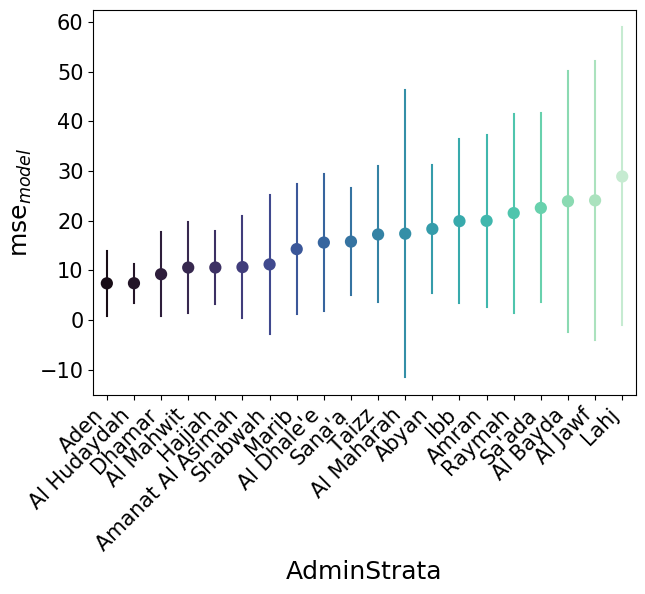

In [12]:
fig, ax = plt.subplots(figsize = (7, 5))
g = sns.pointplot(x = "AdminStrata", y = LABEL, join = False, estimator = np.mean,
                  data = results, dodge = 0.18, ci = "sd", order = order, errwidth = 1.5, 
                  ax = ax, palette = "mako")

if LABEL == "mse$_{naive}$ - mse$_{model}$":
    # Additional plot features.
    ax.axhline(y = 0, color = "black", linestyle = "--")
    xlim = [ax.get_xlim()[0], ax.get_xlim()[1]]
    ylim = [ax.get_ylim()[0], ax.get_ylim()[1]]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.fill_between(xlim, 0, ylim[1], facecolor = "green", alpha = 0.15)
    ax.fill_between(xlim, 0, ylim[0], facecolor = "red", alpha = 0.15)

plt.xticks(rotation = 45, ha = "right")

fig.savefig("mse_provinces_3.png" , bbox_inches = "tight", dpi = 300)

## Exogenous indicators

In [13]:
df = pd.read_csv("../Dataset time-series/output_data/Yemen/Yemen.csv", header = [0, 1], index_col = 0)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df = df.loc[:, (slice(None), ["Price cereals and tubers", "Rainfalls (mm)", "1 Month Anomaly Rainfalls (%)", 
                              "rCSI", "Fatalities", "NDVI Anomaly"])]
df.head()

AdminStrata                         Abyan                          \
Indicator   1 Month Anomaly Rainfalls (%) Fatalities NDVI Anomaly   
Datetime                                                            
2018-01-01                            NaN        NaN          NaN   
2018-01-02                            NaN        NaN          NaN   
2018-01-03                            NaN        NaN          NaN   
2018-01-04                            NaN        NaN          NaN   
2018-01-05                            NaN        NaN          NaN   

AdminStrata                                               \
Indicator   Price cereals and tubers Rainfalls (mm) rCSI   
Datetime                                                   
2018-01-01                       NaN            NaN  NaN   
2018-01-02                       NaN            NaN  NaN   
2018-01-03                       NaN            NaN  NaN   
2018-01-04                       NaN            NaN  NaN   
2018-01-05                       NaN            NaN  NaN   

AdminStrata                          Aden                          \
Indicator   1 Month Anomaly Rainfalls (%) Fatalities NDVI Anomaly   
Datetime                                                            
2018-01-01                            NaN        NaN          NaN   
2018-01-02                            NaN        NaN          NaN   
2018-01-03                            NaN        NaN          NaN   
2018-01-04                            NaN        NaN          NaN   
2018-01-05                            NaN        NaN          NaN   

AdminStrata                           ...      Shabwah  \
Indicator   Price cereals and tubers  ... NDVI Anomaly   
Datetime                              ...                
2018-01-01                       NaN  ...          NaN   
2018-01-02                       NaN  ...          NaN   
2018-01-03                       NaN  ...          NaN   
2018-01-04                       NaN  ...          NaN   
2018-01-05                       NaN  ...          NaN   

AdminStrata                                               \
Indicator   Price cereals and tubers Rainfalls (mm) rCSI   
Datetime                                                   
2018-01-01                       NaN            NaN  NaN   
2018-01-02                       NaN            NaN  NaN   
2018-01-03                       NaN            NaN  NaN   
2018-01-04                       NaN            NaN  NaN   
2018-01-05                       NaN            NaN  NaN   

AdminStrata                         Taizz                          \
Indicator   1 Month Anomaly Rainfalls (%) Fatalities NDVI Anomaly   
Datetime                                                            
2018-01-01                            NaN        NaN          NaN   
2018-01-02                            NaN        NaN          NaN   
2018-01-03                            NaN        NaN          NaN   
2018-01-04                            NaN        NaN          NaN   
2018-01-05                            NaN        NaN          NaN   

AdminStrata                                               
Indicator   Price cereals and tubers Rainfalls (mm) rCSI  
Datetime                                                  
2018-01-01                       NaN            NaN  NaN  
2018-01-02                       NaN            NaN  NaN  
2018-01-03                       NaN            NaN  NaN  
2018-01-04                       NaN            NaN  NaN  
2018-01-05                       NaN            NaN  NaN  

[5 rows x 120 columns]

In [14]:
loss_mean = loss.groupby(level = ["AdminStrata", "Loss"], axis = 1).mean()
loss_mean = pd.melt(loss_mean, value_name = LABEL)

indicator_mean = pd.melt(df.mean().to_frame().T)

d_mean = pd.merge(loss_mean, indicator_mean, on = ["AdminStrata"])
d_mean.drop("Loss", axis = 1, inplace = True)
d_mean.head()

,AdminStrata,mse$_{model}$,Indicator,value
0,Abyan,18.358578,1 Month Anomaly Rainfalls (%),117.098396
1,Abyan,18.358578,Fatalities,45.320607
2,Abyan,18.358578,NDVI Anomaly,109.278449
3,Abyan,18.358578,Price cereals and tubers,0.281624
4,Abyan,18.358578,Rainfalls (mm),2.555330


In [15]:
loss_std = loss.groupby(level = ["AdminStrata", "Loss"], axis = 1).std()
loss_std = pd.melt(loss_std, value_name = LABEL)

indicator_std = pd.melt(df.std().to_frame().T)

d_std = pd.merge(loss_std, indicator_std, on = ["AdminStrata"])
d_std.drop("Loss", axis = 1, inplace = True)
d_std.head()

,AdminStrata,mse$_{model}$,Indicator,value
0,Abyan,13.522481,1 Month Anomaly Rainfalls (%),21.535802
1,Abyan,13.522481,Fatalities,76.153891
2,Abyan,13.522481,NDVI Anomaly,12.918199
3,Abyan,13.522481,Price cereals and tubers,0.138570
4,Abyan,13.522481,Rainfalls (mm),2.627369


In [16]:
ADMINSTRATAS = d_mean["AdminStrata"].unique()

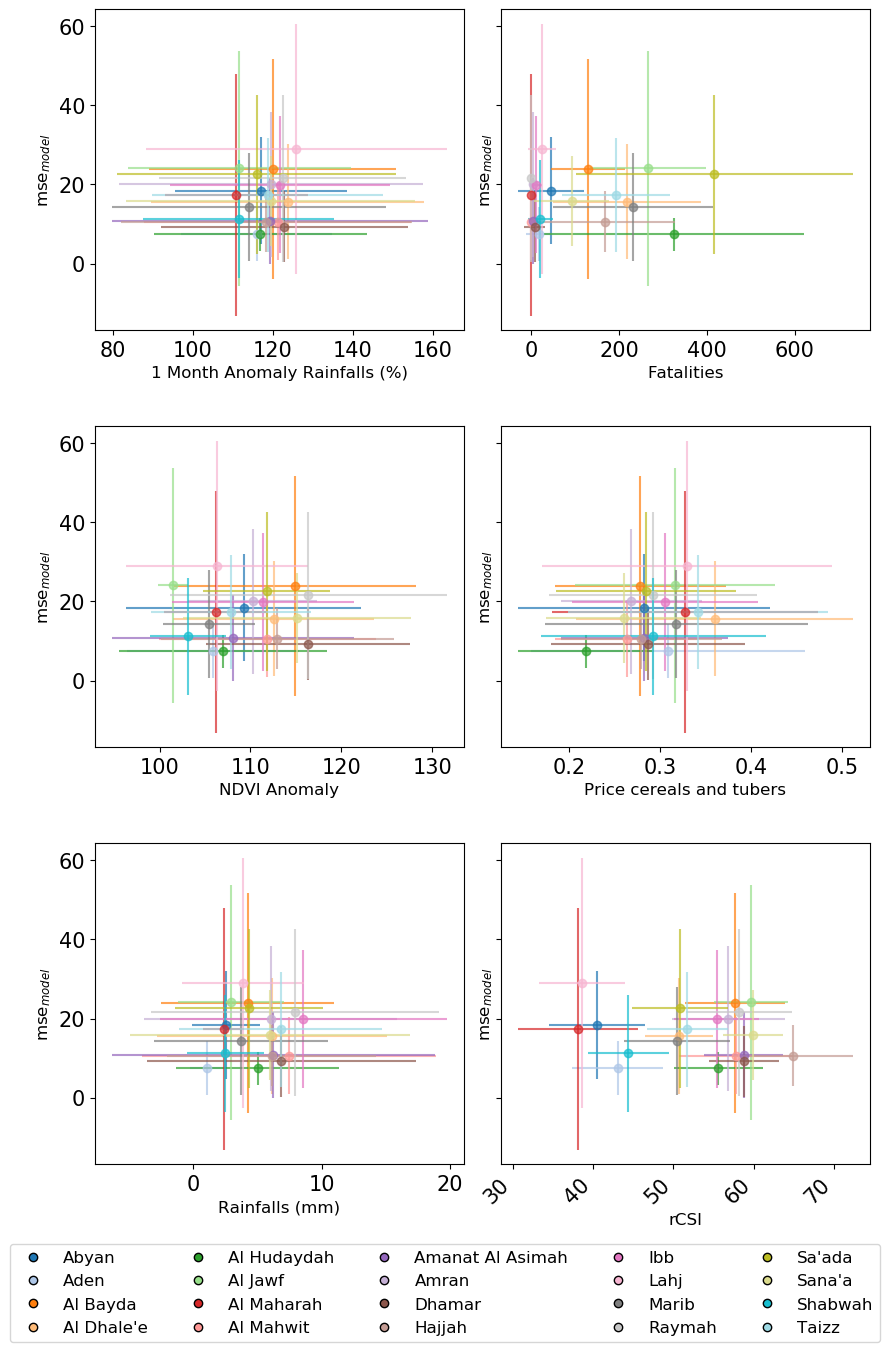

In [17]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15), sharey = True)
fig.subplots_adjust(hspace = .3, wspace = .1)
axs = axs.ravel()

for i, INDICATOR in enumerate(d_mean["Indicator"].unique()):
    mean = d_mean[d_mean["Indicator"] == INDICATOR].set_index("AdminStrata")
    std = d_std[d_std["Indicator"] == INDICATOR].set_index("AdminStrata")

    for j, admin in enumerate(ADMINSTRATAS):
        axs[i].errorbar(mean.loc[admin]["value"], mean.loc[admin][LABEL],
                        xerr = std.loc[admin]["value"], yerr = std.loc[admin][LABEL], marker = "o", 
                        linestyle = "none", color = sns.color_palette("tab20")[j], alpha = 0.7)

    axs[i].set_xlabel(INDICATOR, fontsize = 12)
    axs[i].set_ylabel(LABEL, fontsize = 12)

    if LABEL == "mse$_{naive}$ - mse$_{model}$":
        # Additional plot features.
        axs[i].axhline(y = 0, color = "black", linestyle = "--")
        xlim = [axs[i].get_xlim()[0], axs[i].get_xlim()[1]]
        ylim = [axs[i].get_ylim()[0], axs[i].get_ylim()[1]]
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)

        axs[i].fill_between(xlim, 0, ylim[1], facecolor = "green", alpha = 0.15)
        axs[i].fill_between(xlim, 0, ylim[0], facecolor = "red", alpha = 0.15)

    plt.xticks(rotation = 45, ha = "right")

# Legend.
h = [plt.plot([],[], label = admin, color = sns.color_palette("tab20")[k], marker = "o", ls = "", markeredgewidth = 1, 
              markeredgecolor = "black")[0] for k, admin in enumerate(ADMINSTRATAS)]
axs[i].legend(handles = h, loc = "lower right", bbox_to_anchor = (1.05, -0.58), ncol = 5)

fig.savefig("mse_provinces_5.png" , bbox_inches = "tight", dpi = 300)

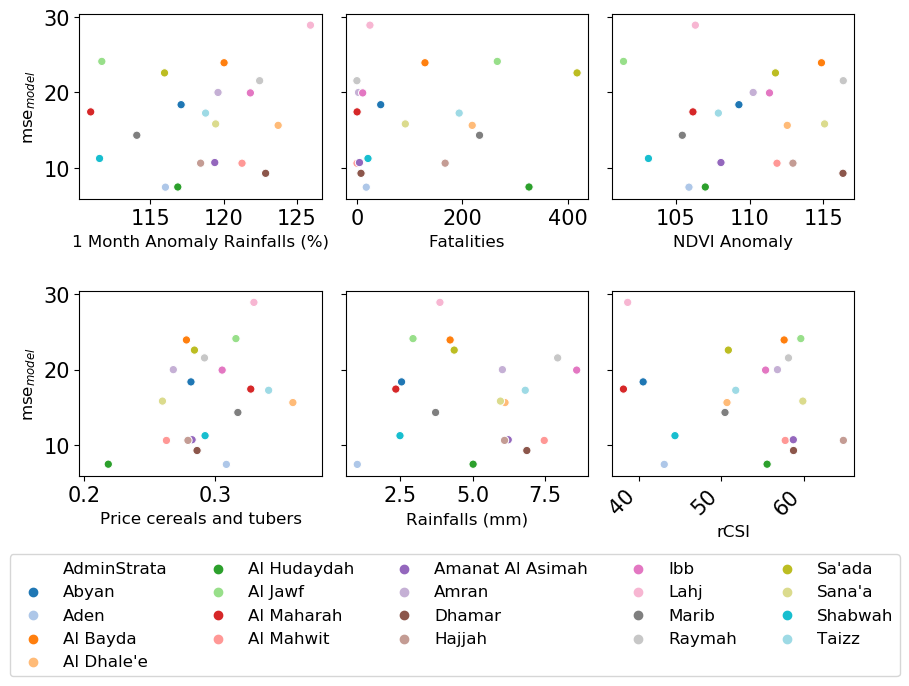

In [18]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6), sharey = True)
fig.subplots_adjust(hspace = .5, wspace = .1)
axs = axs.ravel()

for i, INDICATOR in enumerate(d_mean["Indicator"].unique()):
    x = d_mean[d_mean["Indicator"] == INDICATOR]
    g = sns.scatterplot(x = "value", y = LABEL, hue = "AdminStrata",  
                        data = x, palette = "tab20", ax = axs[i])
    axs[i].set_xlabel(INDICATOR, fontsize = 12)
    axs[i].set_ylabel(LABEL, fontsize = 12)

    if LABEL == "mse$_{naive}$ - mse$_{model}$":
        # Additional plot features.
        axs[i].axhline(y = 0, color = "black", linestyle = "--")
        xlim = [axs[i].get_xlim()[0], axs[i].get_xlim()[1]]
        ylim = [axs[i].get_ylim()[0], axs[i].get_ylim()[1]]
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)

        axs[i].fill_between(xlim, 0, ylim[1], facecolor = "green", alpha = 0.15)
        axs[i].fill_between(xlim, 0, ylim[0], facecolor = "red", alpha = 0.15)

    plt.xticks(rotation = 45, ha = "right")

    if i == 0:
        axs[i].legend(loc = "upper center", bbox_to_anchor = (1.55, -1.88), ncol = 5, frameon = True)
    else:
        axs[i].get_legend().remove()
    
fig.savefig("mse_provinces_6.png" , bbox_inches = "tight", dpi = 300)